In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("../databases/HYDROSWOT_100m_acc_clim_lc_beck.csv", sep=";")

In [5]:
data.columns

Index(['site_no', 'station_name', 'lon', 'lat', 'flowacc', 'stage', 'W', 'dH',
       'dA', 'U', 'clay', 'sand', 'silt', 'PA', 'TA', 'LC1', 'LC2', 'LC3',
       'LC4', 'LC5', 'LC6', 'LC7', 'LC8', 'LC9', 'LC10', 'LC11', 'LC12',
       'Q5_GSCD', 'Q10_GSCD', 'Q20_GSCD', 'QMEAN_GSCD', 'Q80_GSCD', 'Q90_GSCD',
       'Q95_GSCD', 'Q'],
      dtype='object')

In [6]:
river_means=data.groupby("site_no", as_index=False).mean()
river_medians=data.groupby("site_no", as_index=False).median()

# Analyses Kevin

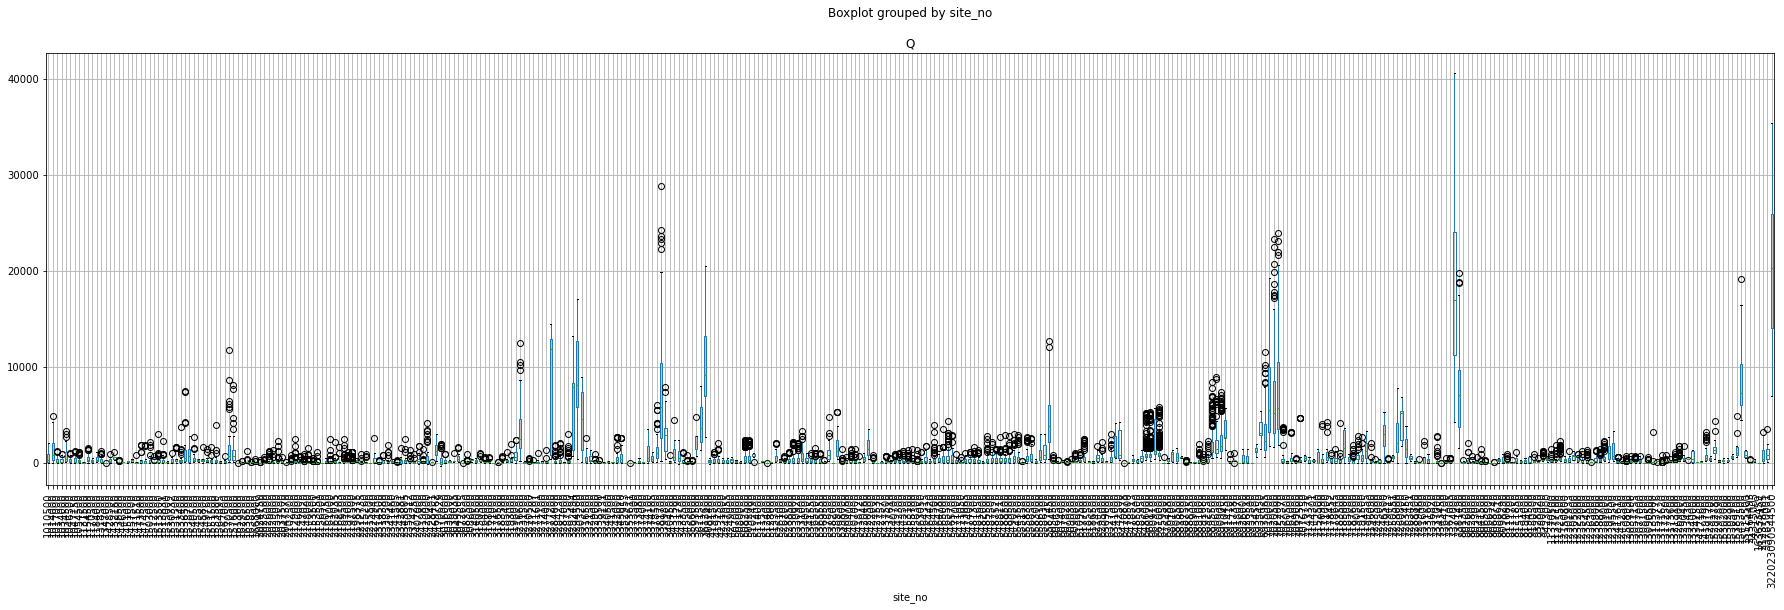

In [5]:
data.boxplot("Q", "site_no", figsize=(30,8), rot=90);

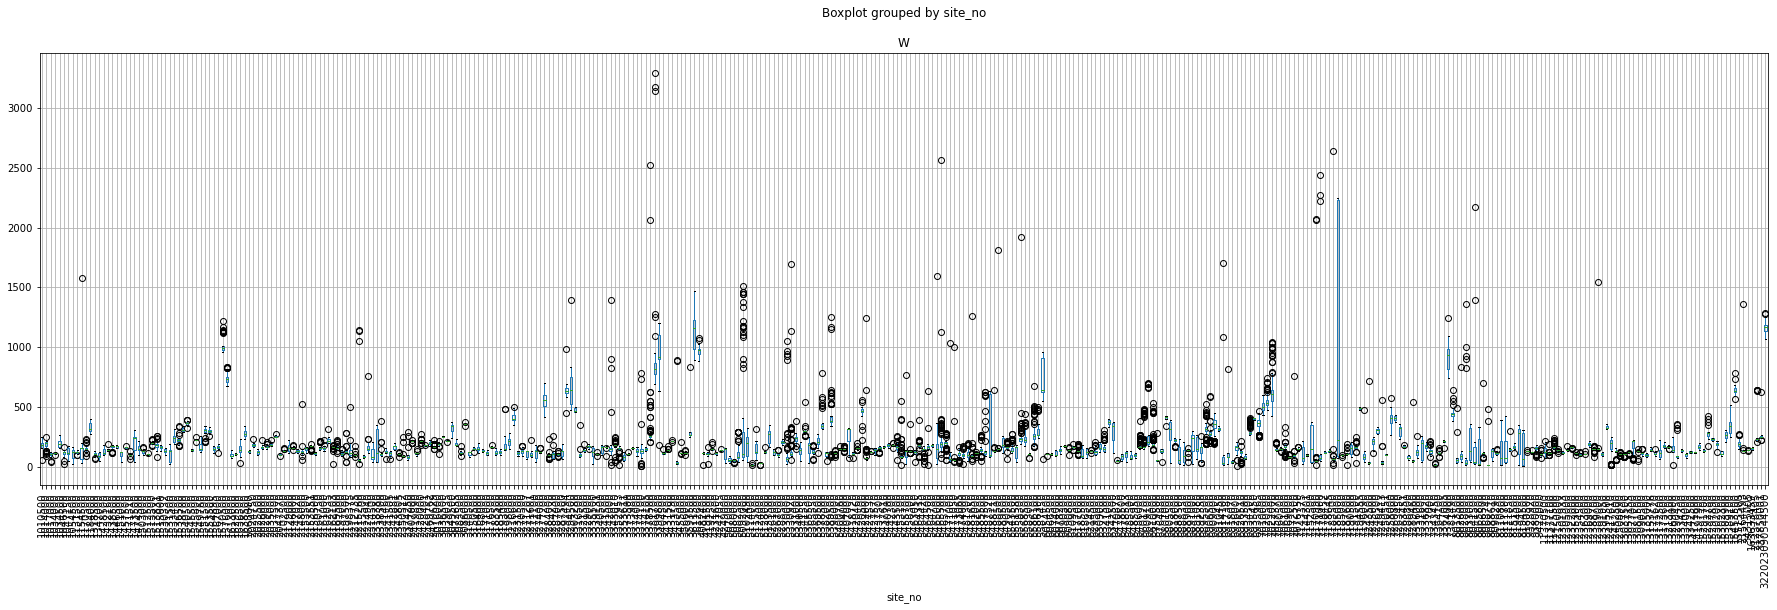

In [6]:
data.boxplot("W", "site_no", figsize=(30,8), rot=90);

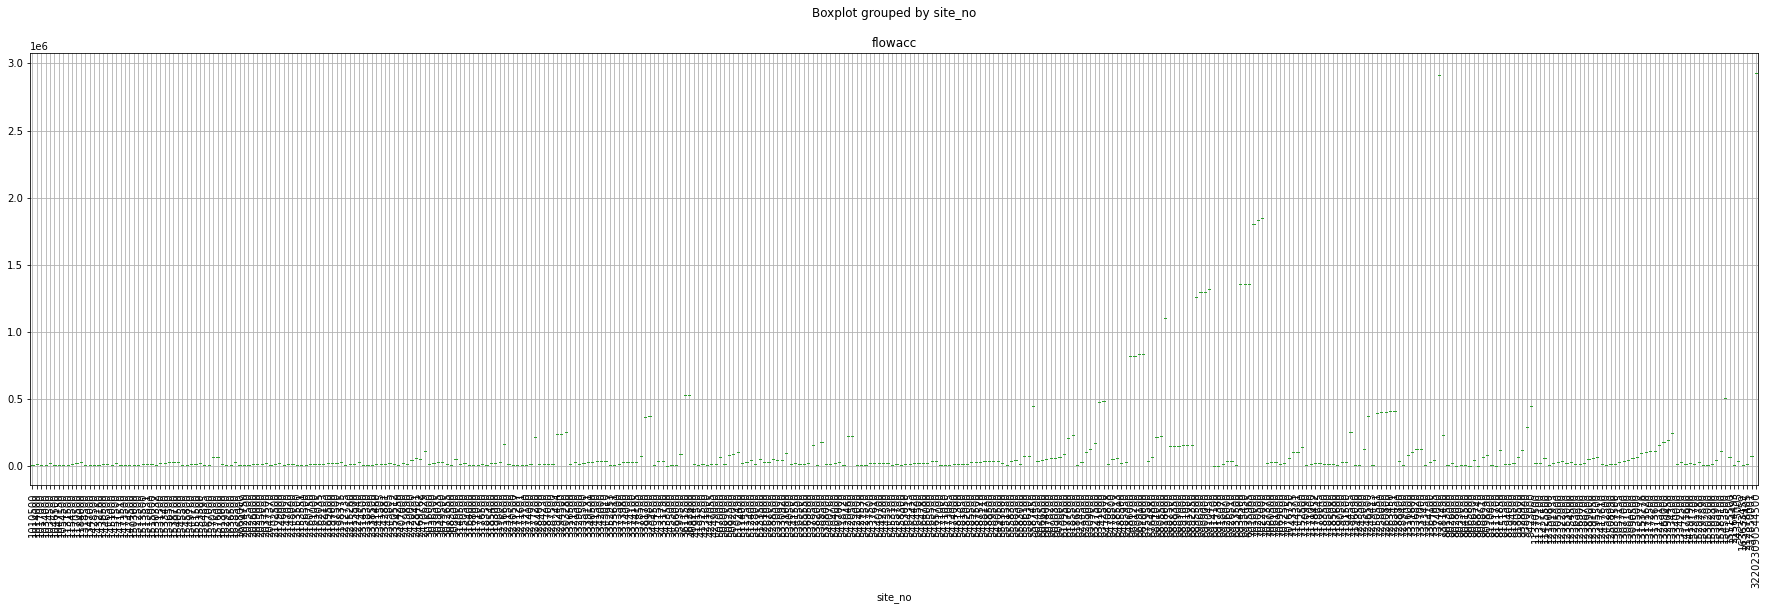

In [7]:
data.boxplot("flowacc", "site_no", figsize=(30,8), rot=90);

# Analyses Quentin

In [7]:
data.head()

,site_no,station_name,lon,lat,flowacc,stage,W,dH,dA,U,...,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
0,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.331720,196.2912,1.938528,240.439534,0.347472,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,56.916862
1,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.654808,219.4560,2.261616,300.786608,0.667512,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,87.782224
2,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,2.712720,190.5000,2.319528,312.657294,0.966216,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,529.525031
3,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,6.263640,202.3872,5.870448,1033.768321,1.996440,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,2500.377554
4,1014000,"St. John River below Fish R, nr Fort Kent, Maine",-68.58,47.28,15356.039445,7.150608,206.0448,6.757416,1220.685874,2.209800,...,0.0,1.190083,99502.325185,61157.019143,33797.196081,9.594206e+06,6429.734027,4146.406794,3498.886439,3228.120511


In [8]:
print(np.shape(data))
n=np.shape(data)[0]

(16828, 35)


## Statistiques descriptives

In [9]:
StJohnRiverData = data[slice(0,40,1)] #Récupération des données de la première station
StJohnRiverData.head()
X=np.arange(0,40,1)

### Aire draînée (flowacc)

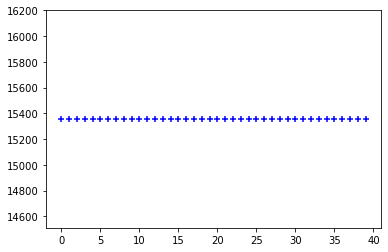

In [35]:
SJR_F = StJohnRiverData.flowacc
plt.scatter(X, SJR_F, color='blue', marker='+')
plt.show()

### Élévation (stage)

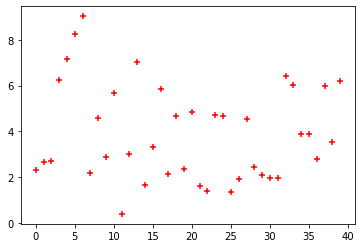

In [36]:
SJR_S = StJohnRiverData.stage
plt.scatter(X, SJR_S, color='red', marker='+')
plt.show()

### Largeur (W)

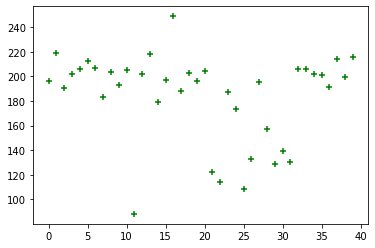

In [37]:
SJR_W = StJohnRiverData.W
plt.scatter(X, SJR_W, color='green', marker='+')
plt.show()

### Débit (Q)

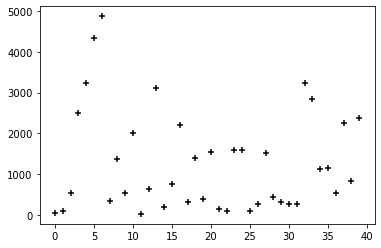

In [38]:
SJR_Q = StJohnRiverData.Q
plt.scatter(X, SJR_Q, color='black', marker='+')
plt.show()

### Corrélations

In [13]:
dataM = data.drop(columns=['site_no', 'station_name', 'U']) #remove site_no & station_name & U
corr = dataM.corr()
corr.style.background_gradient(cmap='coolwarm')

,lon,lat,flowacc,stage,W,dH,dA,clay,sand,silt,PA,TA,LC1,LC2,LC3,LC4,LC5,LC6,LC7,LC8,LC9,LC10,LC11,LC12,Q5_GSCD,Q10_GSCD,Q20_GSCD,QMEAN_GSCD,Q80_GSCD,Q90_GSCD,Q95_GSCD,Q
lon,1.000000,-0.489385,-0.038749,-0.001076,0.060965,0.022356,0.034750,-0.038965,0.060367,-0.050189,0.645932,0.264438,-0.138375,0.054497,0.463809,0.145793,-0.387016,-0.382966,-0.011024,0.078381,0.066923,0.018564,-0.392034,-0.101626,0.028940,0.023502,0.020250,0.026831,0.008320,0.006835,0.005414,0.009546
lat,-0.489385,1.000000,-0.146881,0.055221,-0.122259,-0.010448,-0.084672,-0.090079,-0.010707,0.059106,-0.711407,-0.945619,-0.101939,-0.199507,-0.142339,-0.179403,0.084937,0.169257,0.092168,-0.248626,0.008303,-0.024098,0.343156,0.121218,-0.234480,-0.237083,-0.237521,-0.238782,-0.228087,-0.218926,-0.216859,-0.169543
flowacc,-0.038749,-0.146881,1.000000,-0.032717,0.527150,0.048791,0.300556,0.178888,-0.428178,0.406701,0.087203,0.152361,-0.211220,0.013913,-0.140778,-0.245677,-0.000230,-0.011719,0.106838,0.062146,0.268869,0.023071,-0.053510,0.152109,0.919374,0.899030,0.877871,0.907315,0.636096,0.594144,0.596748,0.644893
stage,-0.001076,0.055221,-0.032717,1.000000,0.013112,0.498417,0.434045,-0.008573,0.079120,-0.087704,-0.016581,-0.055576,0.070941,0.036415,-0.042854,-0.006796,-0.025650,-0.055954,-0.028993,0.026542,0.064212,-0.005646,-0.010743,0.061836,-0.017851,-0.014467,-0.011494,-0.015983,-0.001221,-0.000147,0.000284,0.016756
W,0.060965,-0.122259,0.527150,0.013112,1.000000,0.057919,0.347666,0.072669,-0.302439,0.314723,0.208098,0.127393,-0.092067,-0.027881,-0.001016,-0.112260,-0.067573,-0.091736,0.042187,0.194752,0.100374,0.242454,-0.002970,0.312159,0.597385,0.591913,0.583836,0.592003,0.461182,0.436592,0.439954,0.665749
dH,0.022356,-0.010448,0.048791,0.498417,0.057919,1.000000,0.894764,0.017509,-0.016442,0.010118,0.024879,0.005749,-0.015291,0.000287,-0.008000,0.004689,-0.016832,-0.014621,0.016518,0.005200,0.004350,-0.009842,-0.011875,0.014428,0.052465,0.051349,0.049900,0.051418,0.037642,0.035508,0.035996,0.094419
dA,0.034750,-0.084672,0.300556,0.434045,0.347666,0.894764,1.000000,0.046744,-0.131796,0.129483,0.120629,0.082401,-0.045342,-0.002018,-0.011229,-0.031418,-0.033334,-0.040511,0.012028,0.078342,0.061638,0.002956,-0.009359,0.099563,0.352879,0.354256,0.352076,0.352400,0.302862,0.290514,0.293561,0.500750
clay,-0.038965,-0.090079,0.178888,-0.008573,0.072669,0.017509,0.046744,1.000000,-0.516500,0.083929,-0.107838,0.110115,-0.115127,-0.120216,-0.324761,-0.213943,-0.080891,0.171685,0.249216,-0.027895,0.144093,0.004890,-0.107520,-0.048344,0.104394,0.105139,0.105022,0.105871,0.082442,0.082050,0.082727,0.082861
sand,0.060367,-0.010707,-0.428178,0.079120,-0.302439,-0.016442,-0.131796,-0.516500,1.000000,-0.896598,-0.073591,0.015566,0.383442,0.238579,0.059254,0.447032,0.221843,-0.128924,-0.444602,0.120467,-0.055294,-0.061191,0.013249,-0.108774,-0.388622,-0.373308,-0.359313,-0.379395,-0.215134,-0.198392,-0.200334,-0.293968
silt,-0.050189,0.059106,0.406701,-0.087704,0.314723,0.010118,0.129483,0.083929,-0.896598,1.000000,0.141239,-0.075134,-0.387061,-0.215190,0.098342,-0.410203,-0.215935,0.061334,0.388538,-0.125364,-0.009259,0.068556,0.040805,0.151238,0.398873,0.380700,0.364523,0.387393,0.208455,0.189183,0.191073,0.299823


Observations - Principales corrélations avec Q (par ordre décroissant)
- W (0.67)
- flowacc (0.65)
- dA (0.50)
- silt (0.30)
- PA (0.22)
- sand (-0.29)

## Analyse en Composantes Principales (ACP)

In [18]:
import sklearn
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale

<AxesSubplot:>

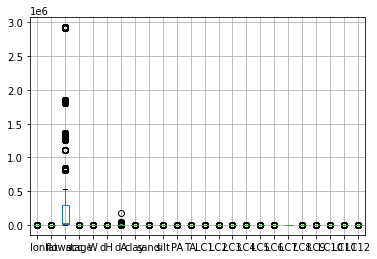

In [27]:
dataACP = dataM.drop(columns=['Q','Q5_GSCD','Q10_GSCD','Q20_GSCD','Q80_GSCD','Q90_GSCD','Q95_GSCD','QMEAN_GSCD']) #remove site_no & station_name & U
dataACP.boxplot()

In [28]:
X=scale(dataACP)

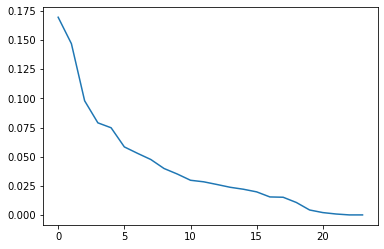

In [29]:
pca = PCA()
## Estimation, calcul des composantes principales
C = pca.fit(X).transform(X)
## Décroissance de la variance expliquée
plt.plot(pca.explained_variance_ratio_)
plt.show()

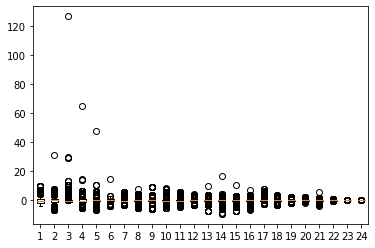

In [30]:
## distribution des composantes principales
plt.boxplot(C[:,0:30])
plt.show()

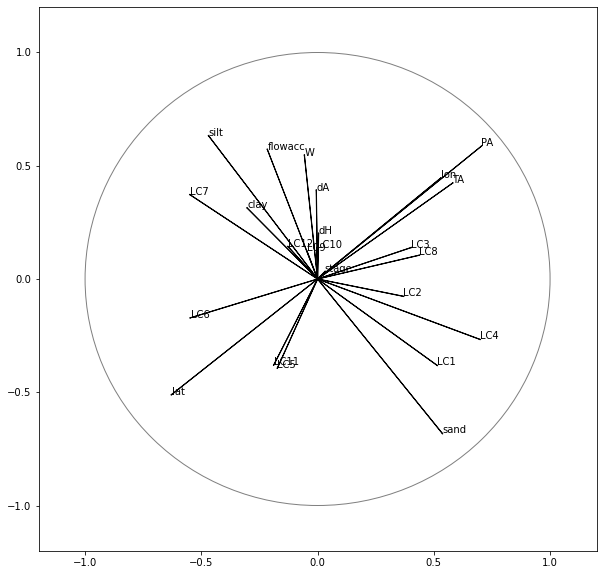

In [33]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataM.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

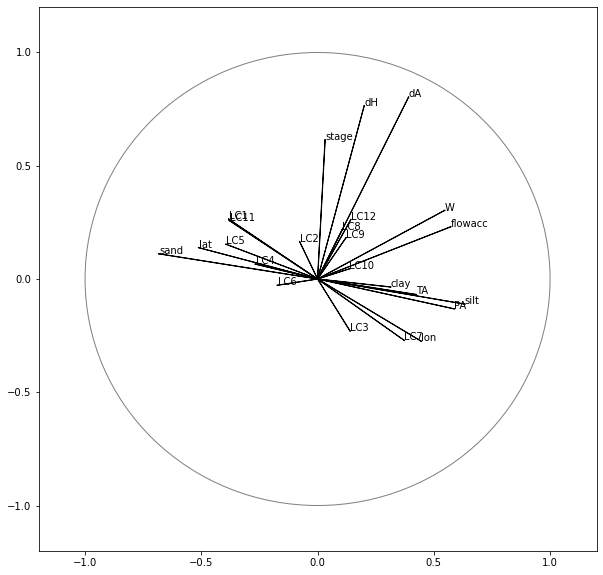

In [34]:
## coordonnées et représentation des variables
coord1=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataM.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

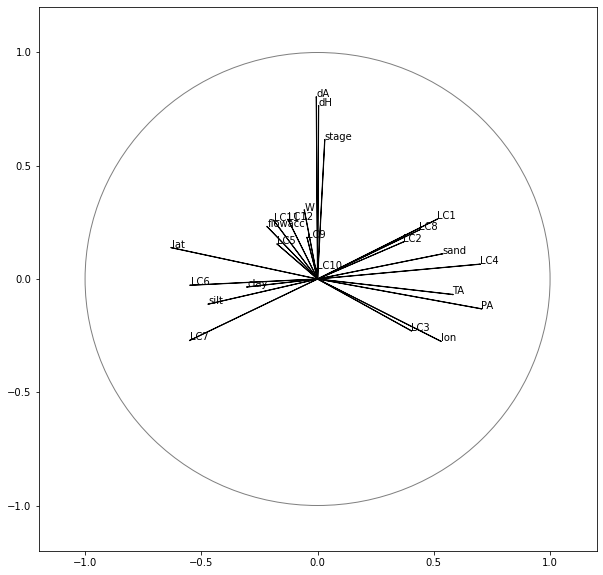

In [35]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[2]*np.sqrt(pca.explained_variance_[2])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataM.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

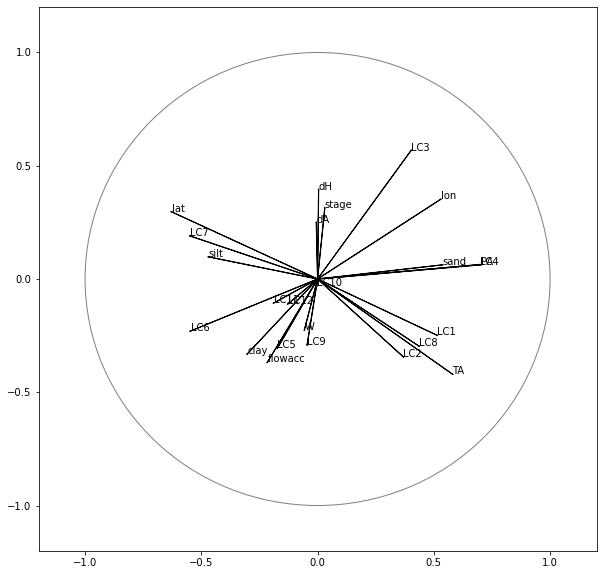

In [36]:
## coordonnées et représentation des variables
coord1=pca.components_[0]*np.sqrt(pca.explained_variance_[0])
coord2=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataM.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

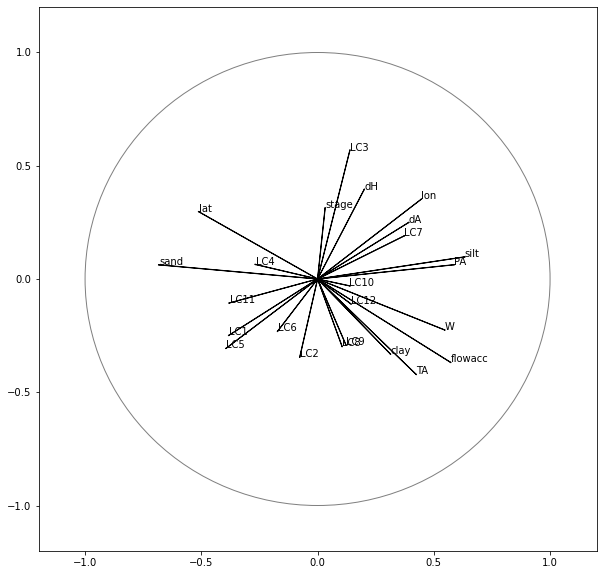

In [37]:
## coordonnées et représentation des variables
coord1=pca.components_[1]*np.sqrt(pca.explained_variance_[1])
coord2=pca.components_[3]*np.sqrt(pca.explained_variance_[3])
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 1, 1)
for i, j, nom in zip(coord1,coord2, dataM.columns):
    plt.text(i, j, nom)
    plt.arrow(0,0,i,j,color='black')
plt.axis((-1.2,1.2,-1.2,1.2))
# cercle
c=plt.Circle((0,0), radius=1, color='gray', fill=False)
ax.add_patch(c)
plt.show()

Variables qui semblent intéressantes de garder selon les graphes des variables de l'ACP :
- PA
- sand
- silt
- W
- flowacc
- dH
- dA
- stage
- LC1
- LC7
- LC4

Modèle 1 : W, flowacc, dA  
Modèle 2 : W, flowacc, dA + PA, dH, stage  
Modèle 3 : W, flowacc, dA + silt, sand  
Modèle 4 : W, flowacc, dA + PA, dH, stage, silt, sand  
Modèle 5 : Modèle 4 + LC1, LC4, LC7  

## Clustering

In [61]:
from scipy.cluster.hierarchy import dendrogram, linkage
river_means_M=river_means.drop(columns=['site_no'])
Z = linkage(river_means.Q,method='ward',metric='euclidean')

ValueError: Length n of condensed distance matrix 'y' must be a binomial coefficient, i.e.there must be a k such that (k \choose 2)=n)!

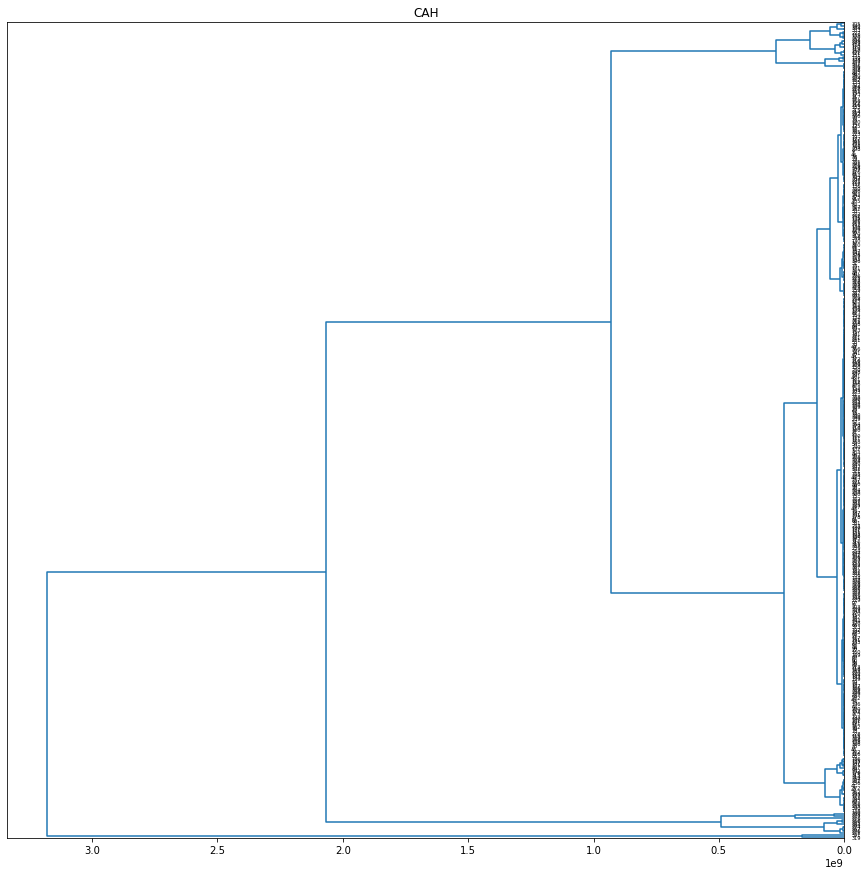

In [54]:
fig = plt.figure(figsize=(15,15))
plt.title("CAH")
dendrogram(Z,orientation='left',color_threshold=0)
plt.show()